In [1]:
'''
We’ve managed to identify 371 of the ghastly creatures, but need your help to vanquish the rest. 
And only an accurate classification algorithm can thwart them. 
Use bone length measurements, severity of rot, extent of soullessness, and other characteristics to distinguish (and extinguish) the intruders. 
Are you ghost-busters up for the challenge?

My assumptions:
- We are dealing with multilevel classification problem (three classes).
- Classes are balanced, which is great news.
'''
%reset

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6

In [7]:
TARGET = 'type'

In [28]:
def get_train():
    return pd.read_csv('train.csv')

def get_test():
    return pd.read_csv('test.csv')

def data_transformation(data):
    data_transformed = data.copy()
    
    # Drop id column.
    data_transformed.drop('id', inplace=True, axis=1)
    
    return data_transformed

# Execute

In [29]:
train = data_transformation(get_train())
test = data_transformation(get_test())
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


# Auxilary data analysis

In [33]:
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


### Target variable

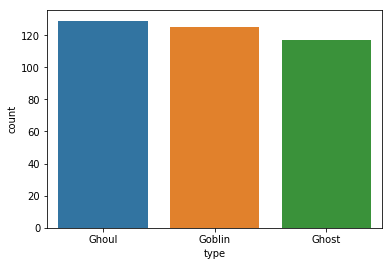

In [10]:
sns.countplot(x=train[TARGET])

In [27]:
train[TARGET].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

### Qualitative data

In [41]:
train['color'].isnull().sum()

0

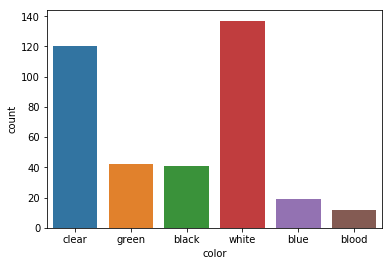

In [32]:
sns.countplot(x=train['color'])
# No NULLs to fill.
# No need to bin data.

### Qualitative data

In [47]:
list(train._get_numeric_data().columns)

['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']

/Users/slechwar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/slechwar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/slechwar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/slechwar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


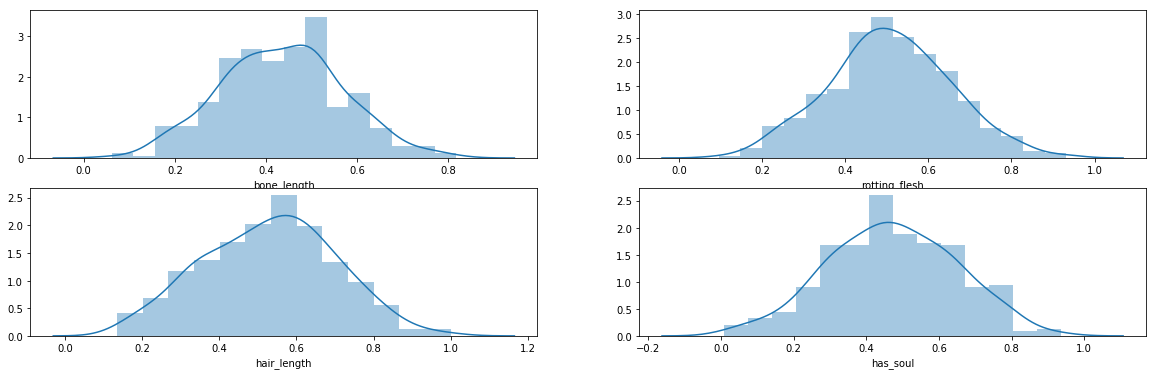

In [65]:
plt.subplot(2, 2, 1)
sns.distplot(a=train['bone_length'])
plt.subplot(2, 2, 2)
sns.distplot(a=train['rotting_flesh'])
plt.subplot(2, 2, 3)
sns.distplot(a=train['hair_length'])
plt.subplot(2, 2, 4)
sns.distplot(a=train['has_soul'])

In [63]:
# Looks like normal distributions, but let's run some normality test.
for column in list(train._get_numeric_data().columns):
    statistics, p_value = shapiro(test[column])
    print('For {}, p_value = {}'.format(column, p_value))
# Not perfect, but also it doesn't look like there's a need for transformation.

For bone_length, p_value = 0.178030326962471
For rotting_flesh, p_value = 0.8899032473564148
For hair_length, p_value = 0.010824302211403847
For has_soul, p_value = 0.5791618824005127


In [ ]:
# Outliers detection.